In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels=train['label'].values

In [5]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

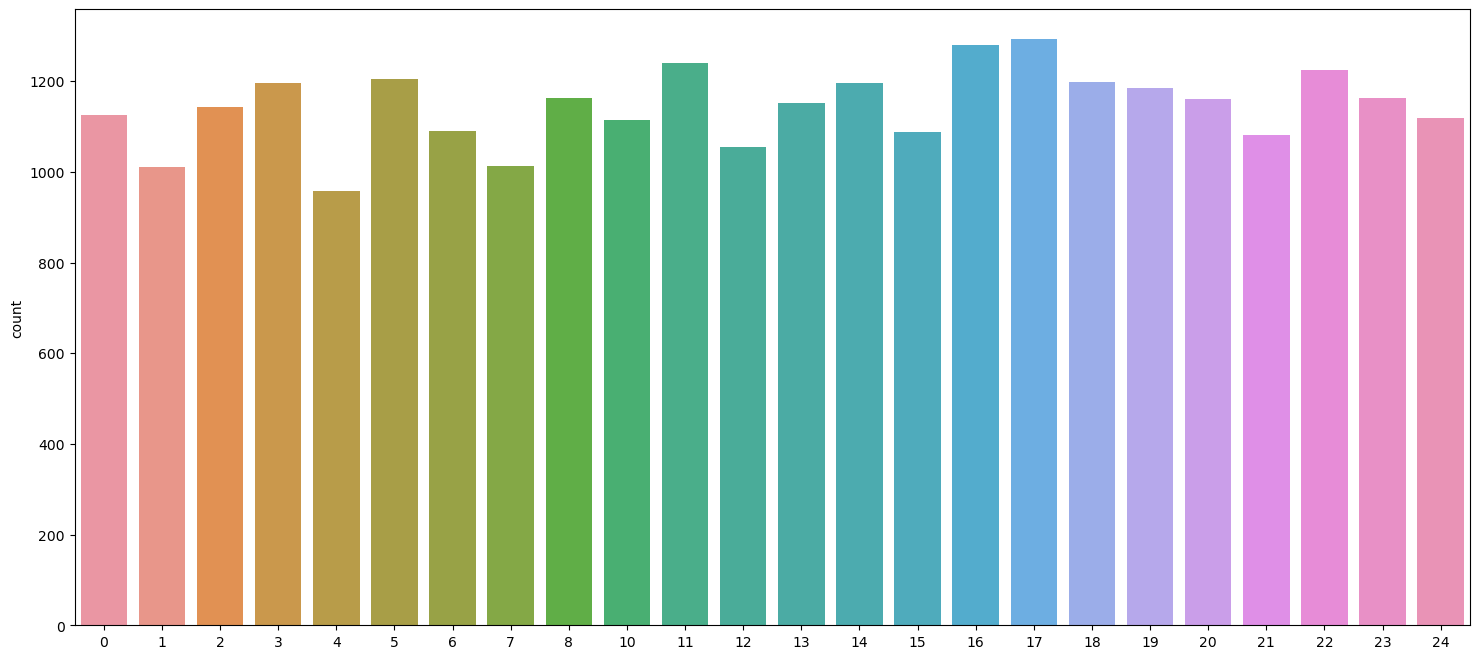

In [6]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [7]:
train.drop('label',axis=1,inplace=True)

In [8]:
images=train.values
images=np.array([np.reshape(i, (28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


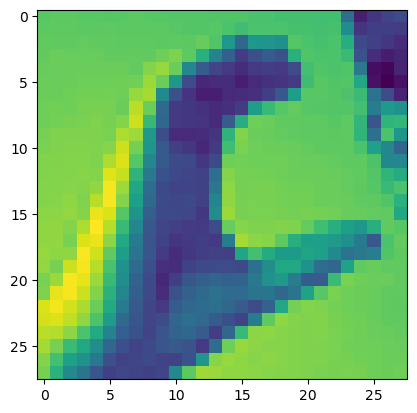

In [11]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
import cv2
import numpy as np

for i in range(0,10):
  rand=np.random.randint(0,len(images))
  input_im = images[rand]

  sample=input_im.reshape(28,28).astype(np.uint8)
  sample=cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
  cv2.waitKey(0)

cv2.destroyAllWindows() 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
X_train = X_train / 255
X_test = X_test / 255

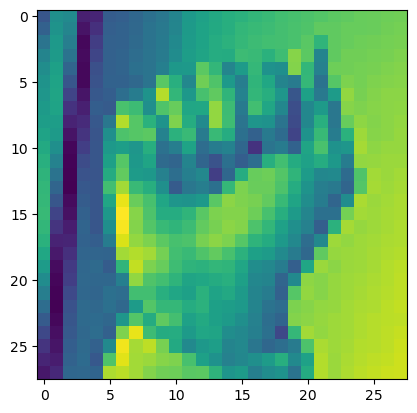

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
plt.imshow(X_train[0].reshape(28,28))

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10


151/151 [==============================] - 8s 44ms/step - loss: 2.5374 - accuracy: 0.2125 - val_loss: 1.5685 - val_accuracy: 0.5063
Epoch 2/10
151/151 [==============================] - 5s 35ms/step - loss: 1.2378 - accuracy: 0.5800 - val_loss: 0.7603 - val_accuracy: 0.7675
Epoch 3/10
151/151 [==============================] - 5s 34ms/step - loss: 0.7124 - accuracy: 0.7588 - val_loss: 0.4867 - val_accuracy: 0.8427
Epoch 4/10
151/151 [==============================] - 5s 35ms/step - loss: 0.4649 - accuracy: 0.8428 - val_loss: 0.2867 - val_accuracy: 0.9156
Epoch 5/10
151/151 [==============================] - 5s 36ms/step - loss: 0.3176 - accuracy: 0.8943 - val_loss: 0.2243 - val_accuracy: 0.9320
Epoch 6/10
151/151 [==============================] - 5s 36ms/step - loss: 0.2197 - accuracy: 0.9287 - val_loss: 0.1215 - val_accuracy: 0.9683
Epoch 7/10
151/151 [==============================] - 5s 34ms/step - loss: 0.1560 - accuracy: 0.9519 - val_loss: 0.0962 - val_accuracy: 0.97

In [21]:
model.save("sign_mnist_cnn_50.Epochs.h5")
print("Model Saved")

Model Saved


C:\Users\deept\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


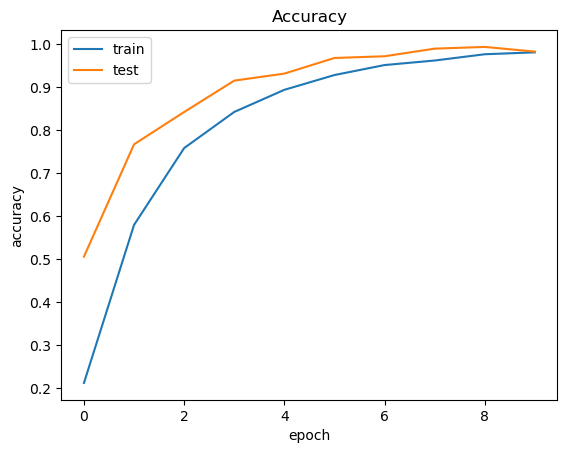

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [23]:
test_labels = test['label']
test.drop('label',axis=1,inplace=True)

test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])

test_labels=label_binrizer.fit_transform(test_labels)

test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred=model.predict(test_images)

225/225 [==============================] - 1s 6ms/step


In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.7479085331846068

In [25]:
def getLetter(result):
  classLabels={ 0: 'Hi',
                1: 'Hello',
                2: 'Thanks',
                3: 'Bye',
                4: 'ILoveYou',
                5: 'Yes',
                6: 'No',
                7: 'IHateYou',
                8: 'Ughhh',
                9: 'Ahem',
               10: 'Peh',
               11: 'Ufff',
               12: 'Uhhh',
               13: 'Blah',
               14: 'Puff',
               15: 'John',
               16: 'Jessy',
               17: 'Dad',
               18: 'Mom',
               19: 'Sissy',
               20: 'Broo',
               21: 'Leo',
               22: 'parthi',
               23: 'elisa',
               24: 'antony',
               25: 'das'}
               
  try:
    res=int(result)
    return classLabels[res]
  except:
    return "Error" 

In [26]:
cap=cv2.VideoCapture(0)

while True:
  ret, frame=cap.read()
  roi=frame[100:400, 320:620]
  cv2.imshow('roi',roi)
  roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
  roi=cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

  cv2.imshow('roi sacled and gray', roi)
  copy=frame.copy()
  cv2.rectangle(copy, (320,100),(620,400),(255,0,0),5)

  roi=roi.reshape(1,28,28,1)
  
  prediction = model.predict(roi, verbose=0)
  predicted_class = int(np.argmax(prediction))
  result = str(predicted_class)
  cv2.putText(copy, getLetter(result), (300,100), cv2.FONT_HERSHEY_COMPLEX, 2,(0,255,0), 2)
  cv2.imshow('frame', copy)

  if cv2.waitKey(1) == 13:
    break

cap.release() 
cv2.destroyAllWindows() 

KeyboardInterrupt: 